In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import gpxpy
import plotly.express as px

from client import SESS_DIR, Client

sns.set_theme()

In [3]:
g = Client()

2025-09-27 00:29:28.967 | INFO     | client:__init__:18 - Loading session from /Users/alex/.cache/garmin


In [10]:
# 0 is latest, go back limit
res = pd.DataFrame(g.get_activities(start=0, limit=500))
res['activityType'] = res['activityType'].apply(lambda d: d.get('typeKey'))

In [12]:
res.query('activityType == "hiking"')

,activityId,activityName,startTimeLocal,startTimeGMT,activityType,eventType,distance,duration,elapsedDuration,movingDuration,...,fastestSplit_21098,courseId,averageSwimCadenceInStrokesPerMinute,averageSwolf,activeLengths,poolLength,unitOfPoolLength,strokes,avgStrokeDistance,avgStrokes
29,20278812111,City of Edinburgh Hiking,2025-09-04 12:18:32,2025-09-04 11:18:32,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",6522.790039,10865.542969,10865.542969,4408.0,...,NaN,3.602148e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,20242999511,Highlands Hiking,2025-09-01 08:09:36,2025-09-01 07:09:36,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",3183.389893,4221.130859,4221.130859,2580.0,...,NaN,3.991371e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,20238518520,Highlands Hiking,2025-08-31 16:33:33,2025-08-31 15:33:33,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",4359.709961,5827.619141,5827.619141,3347.0,...,NaN,3.989315e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,20225538068,Highlands Hiking,2025-08-30 10:45:33,2025-08-30 09:45:33,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",7883.990234,13194.655273,13194.655273,5647.0,...,NaN,3.981784e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,20217397720,Highlands Hiking,2025-08-29 16:56:34,2025-08-29 15:56:34,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",4093.169922,4693.900879,4693.900879,3053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,20215514296,Highlands Hiking,2025-08-29 14:07:55,2025-08-29 13:07:55,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",1945.140015,2879.791992,2879.791992,1365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,20214414359,Highlands Hiking,2025-08-29 10:09:10,2025-08-29 09:09:10,hiking,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",6037.990234,9770.075195,9770.075195,4003.0,...,NaN,3.979834e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
res['activityType'].apply(lambda d: d.get('typeKey')).value_counts()

activityType
running              164
treadmill_running     39
walking               28
indoor_cycling        24
strength_training     13
hiking                 7
lap_swimming           6
track_running          2
cycling                2
trail_running          1
soccer                 1
pilates                1
Name: count, dtype: int64

In [6]:
mask = res["activityType"].apply(lambda d: "running" in d["typeKey"])
run = res.loc[mask]
run.head()

,activityId,activityName,startTimeLocal,startTimeGMT,activityType,eventType,distance,duration,elapsedDuration,movingDuration,...,fastestSplit_21098,courseId,averageSwimCadenceInStrokesPerMinute,averageSwolf,activeLengths,poolLength,unitOfPoolLength,strokes,avgStrokeDistance,avgStrokes
0,20489868467,Recovery,2025-09-24 21:24:40,2025-09-24 18:24:40,"{'typeId': 18, 'typeKey': 'treadmill_running',...","{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",5087.189941,2077.483887,2077.483887,2075.173981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20472605427,Bucharest Running,2025-09-23 09:01:13,2025-09-23 06:01:13,"{'typeId': 1, 'typeKey': 'running', 'parentTyp...","{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",5053.439941,1646.952026,1698.256958,1640.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20452902470,Bucharest Running,2025-09-21 09:48:21,2025-09-21 06:48:21,"{'typeId': 1, 'typeKey': 'running', 'parentTyp...","{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",21139.789062,7188.162109,7474.581055,7103.127991,...,7461.035156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20447844132,Bucharest Track Running,2025-09-20 19:15:26,2025-09-20 16:15:26,"{'typeId': 8, 'typeKey': 'track_running', 'par...","{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",6860.000000,2018.090942,2018.090942,2015.276993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20436908352,Bucharest Running,2025-09-19 19:08:18,2025-09-19 16:08:18,"{'typeId': 1, 'typeKey': 'running', 'parentTyp...","{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",5022.870117,1390.369019,1390.369019,1388.529022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data = g.get_activity(activity_id='20489868467', format='gpx').decode()
gpx = gpxpy.parse(data)
gpx

GPX(tracks=[GPXTrack(name='Recovery', segments=[GPXTrackSegment(points=[])])])

In [43]:
hr = [
    int(pt.extensions[0].find('.//{*}hr').text) for pt in gpx.tracks[0].segments[0].points
]
px.scatter(hr)


In [47]:
x = run.query('distance >= 15000').iloc[0].to_dict()

In [50]:
df = g.csv_bytes_to_pandas(g.get_activity(activity_id=x['activityId'], format='csv'))
df

,Split,Time,Moving Time,Distance,Elevation Gain,Elev Loss,Avg Pace,Avg Moving Paces,Best Pace,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg HR,Max HR,Avg Temperature,Calories
0,1,00:05:27.254,00:05:24.000,1.00,0,0,0:05:27,0:05:23,0:04:01,152.718750,163.0,117.930005,154.0,170.0,31.00,78
1,2,00:05:20.828,00:05:17.000,1.00,4,0,0:05:20,0:05:16,0:04:48,155.312500,163.0,119.719995,170.0,176.0,29.00,81
2,3,00:05:23.649,00:05:23.649,1.00,1,1,0:05:23,0:05:23,0:05:09,155.625000,161.0,117.840002,173.0,177.0,28.00,82
3,4,00:05:23.292,00:05:17.000,1.00,2,0,0:05:23,0:05:16,0:04:44,150.312500,163.0,120.250000,169.0,182.0,29.00,79
4,5,00:05:30.578,00:05:30.578,1.00,2,0,0:05:30,0:05:30,0:05:18,155.515625,160.0,114.709998,177.0,181.0,28.00,82
5,6,00:05:31.258,00:05:29.000,1.00,1,5,0:05:31,0:05:29,0:04:47,155.343750,164.0,115.969995,169.0,179.0,28.00,78
6,7,00:05:33.010,00:05:33.000,1.00,1,15,0:05:33,0:05:33,0:05:20,156.765625,163.0,114.490002,172.0,178.0,28.00,81
7,8,00:05:27.624,00:05:27.624,1.00,1,1,0:05:27,0:05:27,0:04:56,155.593750,165.0,116.530005,167.0,179.0,28.00,77
8,9,00:05:36.334,00:05:36.000,1.00,0,0,0:05:36,0:05:36,0:05:29,156.765625,161.0,113.069995,168.0,171.0,26.00,80
9,10,00:05:32.565,00:05:32.565,1.00,0,0,0:05:32,0:05:32,0:05:18,157.968750,161.0,114.430005,169.0,173.0,26.00,80


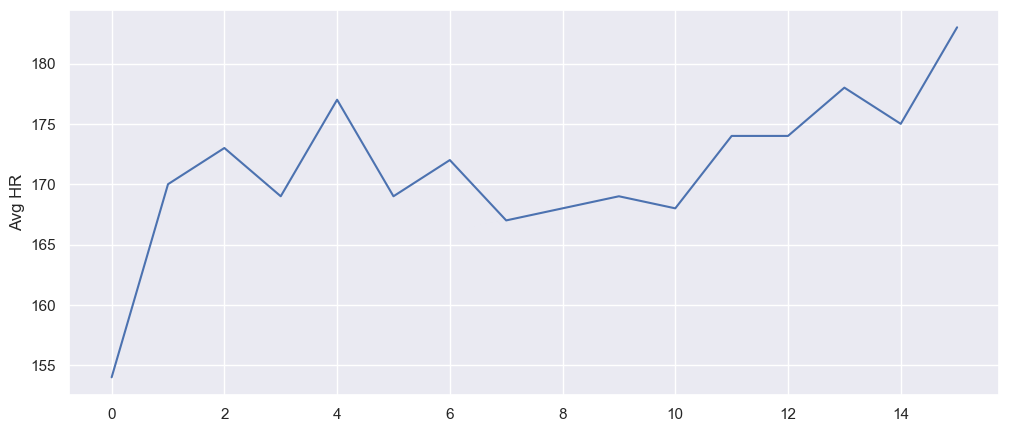

In [109]:
xs = df.iloc[:-1]['Avg Pace']
xs = pd.to_timedelta(xs).dt.total_seconds()

ys = df.iloc[:-1]['Avg HR']

ix = np.arange(len(xs))

plt.figure(figsize=(12, 5))
# sns.scatterplot(x=ix, y=xs, palette='rocket', label='avg pace')
# sns.scatterplot(x=ix, y=ys, palette='rocket', label='avg hr')
sns.lineplot(x=ix, y=ys)

# plt.xticks(ix, labels=1+ix)
pass